Finding the top-N frequent tags in the questions

In [ ]:
import os
import collections
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/My\ Drive/*.py
import sys
sys.path.append('/content/drive/My Drive')

'/content/drive/My Drive/post_parser_record.py'
'/content/drive/My Drive/Post.py'


# Part 1

In [ ]:
from post_parser_record import PostParserRecord


def find_frequent_tag(post_reader, limit):
  # This methods takes in post_reader and 
  # find the most frequent tags in questions
  all_tags = []
  most_common_tags = []
  for question_id in post_reader.map_questions:
    question = post_reader.map_questions[question_id]
    # current question tags
    tags = question.tags
    for tag in tags:
      all_tags.append(tag)

  counterTags = collections.Counter(all_tags)
  top_tags = counterTags.most_common(limit)
  
  for tag in top_tags:
      most_common_tags.append(tag[0])
    
    
  return most_common_tags

In [ ]:
# Function to get tag frequencies. Frequencies will be reversed to pass to Zipf
# function.
def find_tag_frequencies(post_reader, limit):
  all_tags = []
  most_common_tags = []
  for question_id in post_reader.map_questions:
    question = post_reader.map_questions[question_id]
    
    tags = question.tags
    for tag in tags:
      all_tags.append(tag)

  counterTags = collections.Counter(all_tags)
  tag_freq = counterTags.most_common(limit)

  reversed_freq = []

  for item in tag_freq:
    new_item = item[::-1]
    reversed_freq.append(new_item)

  return reversed_freq

In [ ]:
find_tag_frequencies(post_reader, 30)

[(6742, 'united-states'),
 (2648, 'copyright'),
 (1760, 'united-kingdom'),
 (1679, 'criminal-law'),
 (1597, 'contract-law'),
 (971, 'intellectual-property'),
 (902, 'internet'),
 (862, 'gdpr'),
 (814, 'software'),
 (804, 'california'),
 (803, 'privacy'),
 (800, 'employment'),
 (788, 'licensing'),
 (735, 'england-and-wales'),
 (730, 'international'),
 (695, 'canada'),
 (682, 'european-union'),
 (594, 'contract'),
 (565, 'constitutional-law'),
 (556, 'trademark'),
 (532, 'tax-law'),
 (500, 'business'),
 (497, 'civil-law'),
 (476, 'legal-terms'),
 (458, 'liability'),
 (453, 'police'),
 (443, 'rental-property'),
 (436, 'us-constitution'),
 (417, 'real-estate'),
 (412, 'germany')]

In [ ]:
!ls /content/drive/My\ Drive/*.xml


'/content/drive/My Drive/Posts.xml'



Step 2: Tokenization and Removing Stop words

In [ ]:
post_file_path = "/content/drive/My Drive/Posts.xml"
post_reader = PostParserRecord(post_file_path)
stop_words = set(stopwords.words('english'))
limit = 5
common_tags_list = find_frequent_tag(post_reader, limit)
# You might need more variables here

#print(find_frequent_tag(post_reader, limit))

removed_stopwords = []
all_tags = []

for question_id in post_reader.map_questions:
    question = post_reader.map_questions[question_id]
    # current question body
    text = question.body
    # current question tags
    lst_tags = question.tags
    # Tokenize
    # Remove stop-words
    # You might save the words here to later sort them by count
    #word_tokens = word_tokenize(lst_tags)
    #print(type(lst_tags))

    for tag in lst_tags:
      if tag in stop_words:
        print("yup")
      else:
        all_tags.append(tag)

print(stop_words)
print(filtered_sentence)
print(len(all_tags))

{'for', 'very', 'in', 'now', 'is', 'because', 'over', 'no', 'then', 'who', 've', 'up', 'her', 'd', 'has', 'so', 'himself', 'should', 'while', 're', 'there', 'haven', 'against', 'he', 'will', 'the', 'few', "don't", 'shouldn', 'ours', 'o', "hasn't", "shan't", 'here', 'we', "hadn't", 'herself', 'whom', 'am', 's', 'can', 'were', 'an', 'again', 'him', 'doing', 'shan', 'any', 'only', 'it', 'couldn', 'ain', 'mustn', 'aren', "should've", 'that', 'do', 'theirs', 'll', 'below', 'from', 'my', 'hasn', 'during', 'each', 'when', 'where', 'all', "doesn't", "it's", 'what', 'or', 'weren', 'both', "isn't", 'hers', 'yourself', 'how', "wouldn't", 'isn', 'as', 'most', "that'll", "didn't", 'at', 'into', "you've", "won't", 'and', 'above', 'than', 'some', 'had', 'itself', 'didn', 'their', 'this', 'don', 'are', 'ma', 'does', 'these', 'your', 'if', "wasn't", 'ourselves', 'did', 'just', 'i', 'but', 'with', 'its', "weren't", 'not', 'won', 'you', 'between', 'a', 'other', "haven't", 'such', 'out', 'them', 'been', "

In [ ]:
# word cloud
def professorDoesntWantSpagettiCode(text):
    wordcloud = WordCloud(width=800, height=800,
                    background_color ='white',
                    stopwords = stopwords.words('english'),
                    min_font_size = 10).generate(text)
    
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    
    plt.show()

Word Cloud

of
in


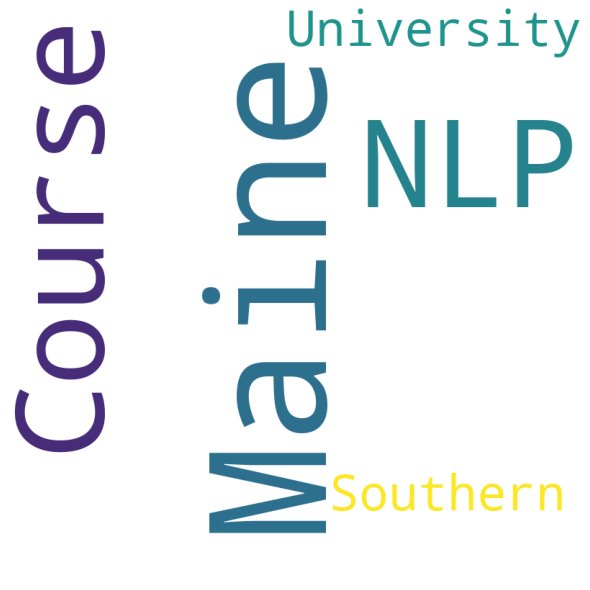

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
word_list = ["NLP", "Course", "University", "of", "Southern", "Maine", "in", "Maine"]

text = " ".join(word_list)

professorDoesntWantSpagettiCode(text)

Zip's Law; Sample code from StackOverFlow

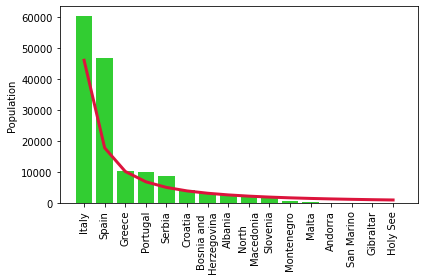

In [ ]:
import matplotlib.pyplot as plt
from scipy.stats import zipf

lst = [(60462, 'Italy'), (46755, 'Spain'), (10423, 'Greece'), (10197, 'Portugal'), (8737, 'Serbia'), (4105, 'Croatia'),
       (3281, 'Bosnia and\nHerzegovina'), (2878, 'Albania'), (2083, 'North\nMacedonia'), (2079, 'Slovenia'),
       (628, 'Montenegro'), (442, 'Malta'), (77, 'Andorra'), (34, 'San Marino'), (34, 'Gibraltar'), (1, 'Holy See')]

def zipf_graph(lst):
  plt.bar([key for val, key in lst], [val for val, key in lst], color='limegreen')
  alpha = 1.37065874
  total = sum([p for p, c in lst])
  plt.plot(range(len(lst)), [zipf.pmf(p, alpha) * total for p in range(1, len(lst) + 1)], color='crimson', lw=3)
  plt.ylabel("Population")
  plt.xticks(rotation='vertical')
  plt.tight_layout()
  plt.show()

zipf_graph(lst)

# Part 3

['united-states', 'copyright', 'united-kingdom', 'criminal-law', 'contract-law', 'intellectual-property', 'internet', 'gdpr', 'software', 'california', 'privacy', 'employment', 'licensing', 'england-and-wales', 'international', 'canada', 'european-union', 'contract', 'constitutional-law', 'trademark', 'tax-law', 'business', 'civil-law', 'legal-terms', 'liability', 'police', 'rental-property', 'us-constitution', 'real-estate', 'germany']


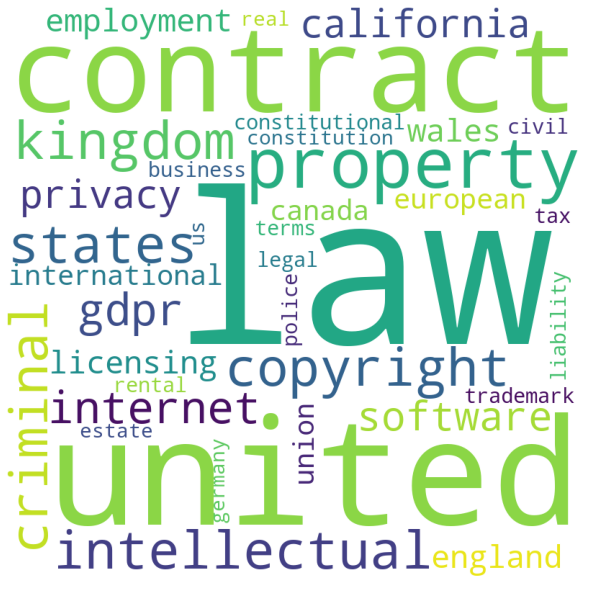

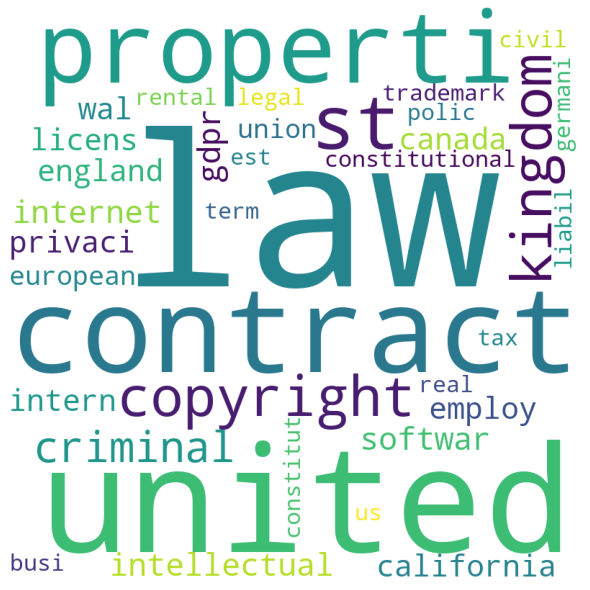

In [ ]:
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import *
import matplotlib.pyplot as plt
import collections

# word cloud
word_list = find_frequent_tag(post_reader,30)
print(word_list)
text = " ".join([str(i) for i in word_list])
professorDoesntWantSpagettiCode(text)

# Word cloud with stemming
porter = PorterStemmer()
word_list = [porter.stem(word) for word in [str(i) for i in word_list]]
text = " ".join([str(i) for i in word_list])
professorDoesntWantSpagettiCode(text)

# Part 4

['united-states', 'copyright', 'united-kingdom', 'criminal-law', 'contract-law', 'intellectual-property', 'internet', 'gdpr', 'software', 'california', 'privacy', 'employment', 'licensing', 'england-and-wales', 'international', 'canada', 'european-union', 'contract', 'constitutional-law', 'trademark', 'tax-law', 'business', 'civil-law', 'legal-terms', 'liability', 'police', 'rental-property', 'us-constitution', 'real-estate', 'germany']


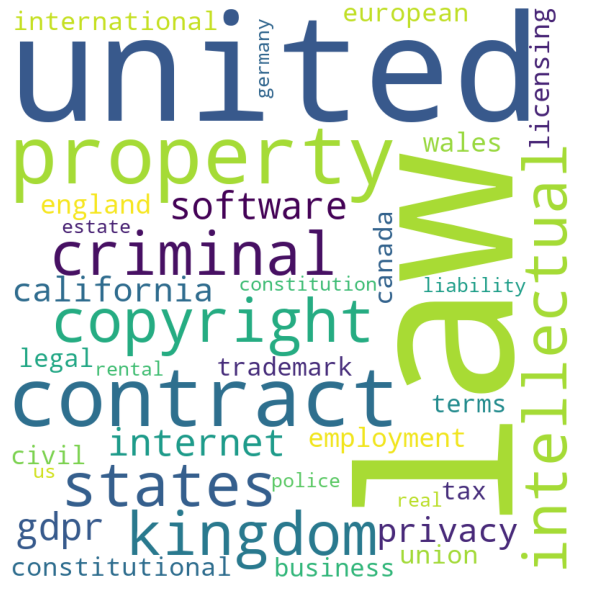

In [ ]:
top30 = find_frequent_tag(post_reader, 30)
print(top30)
words = []

for word in top30:
    words.append(word)
    
text = " ".join(words)

# WordCloud without stopwords removed
professorDoesntWantSpagettiCode(text)

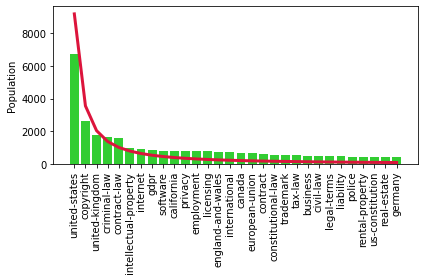

In [ ]:
# Zipf Graph for word frequencies
zipf_graph(find_tag_frequencies(post_reader, 30))